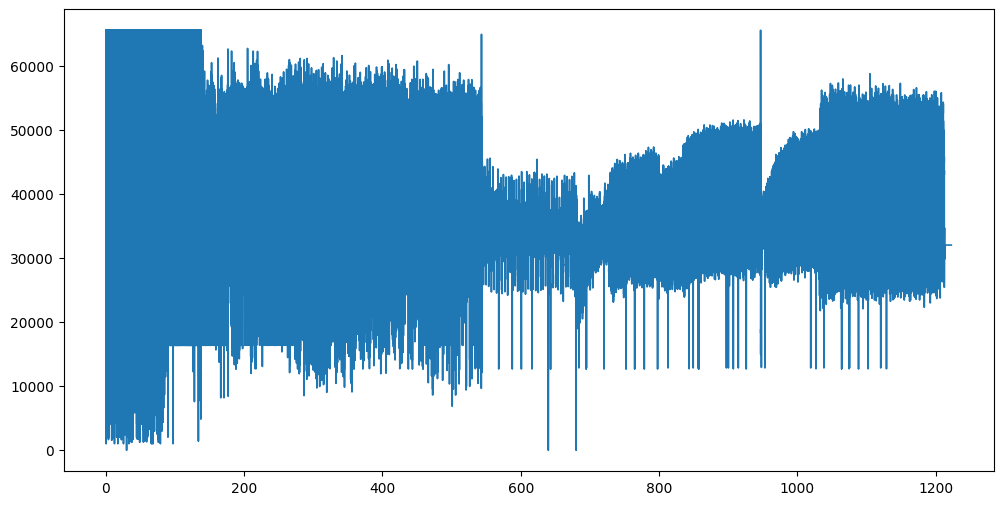

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

ecg_csv_path = "sin_y_cuad_ECG_timeline_20251218_115029.csv"      # ← pon aquí tu archivo ECG
events_csv_path = "sin_y_cuad_STIM_EVENTS_20251218_115029.csv"  # ← pon aquí tu archivo de eventos

fs = 1000  # Hz


ecg = pd.read_csv(ecg_csv_path, sep=";", decimal=",", dtype={"Index": "Int64"})
ch1_val = ecg["Ch1_val_uV"].to_list()
ch2_val = ecg["Ch2_val_uV"].to_list()
time_index = np.arange(len(ch1_val)) / fs  # desde 0 hasta (len-1)/fs


# -----------------------------
# Gráfico
# -----------------------------


ch1_color = "#1f77b4"  # azul
ch2_color = "#ff7f0e"  # naranja

ch1_color = "#1f77b4"  # azul
ch1_color_stim = "#8f57b0"  # morado

ch2_color = "#ff7f0e"  # naranja
ch2_color_stim = "#007f0e"  # naranja

t0_us = np.nanmin([ecg["Ch1_ts_us"].min(), ecg["Ch2_ts_us"].min()])

events = pd.read_csv(events_csv_path, sep=";", dtype={"ch1_idx": "Int64", "ch2_idx": "Int64"})
times_stims_A = events["ch1_idx"]/fs
times_stims_B = events["ch2_idx"]/fs



plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.plot(time_index, ch1_val, color=ch1_color, lw=1.2, label="Ch1 (µV)")
# ax.plot(time_index, ch2_val, color =ch2_color, lw=1.2, label="Ch2 (µV)")

# for t in times_stims_A[1:]:
#         ax.axvline(t, color=ch1_color_stim, lw=1.4, linestyle="-", alpha=0.9)

# for t in times_stims_B[1:]:
#         ax.axvline(t, color=ch2_color_stim, lw=1.4, linestyle="-", alpha=0.9)

# ax.set_xlim(left=0.5, right = 0.6)

In [5]:

import pandas as pd
import numpy as np
import plotly.graph_objects as go

import plotly.graph_objects as go
import plotly.io as pio


# Rutas de los archivos

fs = 3000  # Hz

# Leer datos
ecg = pd.read_csv(ecg_csv_path, sep=";", decimal=",", dtype={"Index": "Int64"})
ch1_val = ecg["Ch1_val_uV"].to_list()
ch2_val = ecg["Ch2_val_uV"].to_list()
time_index = np.arange(len(ch1_val)) / fs

# Leer eventos
events = pd.read_csv(events_csv_path, sep=";", dtype={"ch1_idx": "Int64", "ch2_idx": "Int64"})
times_stims_A = events["ch1_idx"] / fs
times_stims_B = events["ch2_idx"] / fs

# Colores
ch1_color = "#1f77b4"
ch2_color = "#ff7f0e"
ch1_color_stim = "#8f57b0"
ch2_color_stim = "#007f0e"

# Crear figura interactiva
fig = go.Figure()

# Canal 1
fig.add_trace(go.Scatter(x=time_index, y=ch1_val, mode='lines', name='Ch1 (µV)', line=dict(color=ch1_color)))

# Canal 2 (opcional)
# fig.add_trace(go.Scatter(x=time_index, y=ch2_val, mode='lines', name='Ch2 (µV)', line=dict(color=ch2_color)))

# Líneas de estímulos
for t in times_stims_A[1:]:
    fig.add_vline(x=t, line=dict(color=ch1_color_stim, width=1.4), opacity=0.9)

for t in times_stims_B[1:]:
    fig.add_vline(x=t, line=dict(color=ch2_color_stim, width=1.4), opacity=0.9)

# Ajustar rango inicial
# fig.update_xaxes(range=[0.5, 0.6])

# Título y diseño
fig.update_layout(title="Received values", xaxis_title="Time (?)", yaxis_title="Voltage (µV)", template="plotly_white")


pio.renderers.default = "browser"

# ... tu código para construir 'fig' ...

# (añade tus traces y vlines aquí)

fig.show()  # Esto abrirá una pestaña del navegador con el

